# Training a MLP model to solve the XOR problem
In this notebook we show the forward and backward propagation phases in the training process of an MLP model. Our goal is to model the XOR function.
In the XOR problem, the inputs are binary (0 or 1) and the output is also binary as shown in the following table.

| Input 1 | Input 2 | XOR |
|---------|---------|-----|
|    0    |    0    |  0  |
|    0    |    1    |  1  |
|    1    |    0    |  1  |
|    1    |    1    |  0  |

# Activation and cost functions
First we define the activation function used in both hidden and output layers (the sigmoid), and the cost function, the Mean Squared Error (MSE). The are defined as:
$$\sigma(z)=\frac{1}{1-e^{-z}}\qquad J(y,\hat{y})=\frac{1}{2m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$$
where $m$ is the number of training samples in a mini batch.

In [1]:
# Author: Roberto Doriguzzi-Corin
# Project: Course on Network Intrusion and Anomaly Detection with Machine Learning
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
import matplotlib.pyplot as plt
SEED = 0

np.random.seed(SEED)

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):
    return y * (1 - y)

# Define the loss and its derivative
def loss(y_true, y_pred, loss='mse'):
    if loss == 'mse': #MSE
        return (0.5 * np.mean((y_pred-y_true) ** 2))
    else: #binary cross-entropy
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
        return (-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))).item()

def loss_derivative(y_true, y_pred, loss='mse'):
    if loss == 'mse': #MSE
        return y_pred - y_true
    else:
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid division by zero
        return (y_pred - y_true) / (y_pred * (1 - y_pred))
    

# Multi-layer perceptron for binary classification
The MLP model is defined in the next cell and follows the architecture depicted in the figure below, where \(x=\{x_1,x_2\}\) is an input sample consisting of 2 features.

| MLP model           |
|--------------------|
| <img src="./MLP_architecture.png" width="80%">  |

In [2]:
# Define the dataset (example data)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Corresponding target values (labels)
Y = np.array([[0],
              [1],
              [1],
              [0]])

# Define the hyperparameters
n0 = 2 # input size
n1 = 3 # hidden layer size
n2 = 1 # output size
learning_rate = 0.1
epochs = 20000

# Initialize weights and biases with random numbers (uniform distribution)
W1 = np.random.uniform(size=(n0, n1)) # hidden layer weights
b1 = np.random.uniform(size=(1, n1)) # hidden layer biases
W2 = np.random.uniform(size=(n1, n2)) # output layer weights
b2 = np.random.uniform(size=(1, n2)) # output layer bias

# Forward and backward propagations
In the next cell, the MLP model is trained with Gradient Descent through multiple epochs of forward and backward propagations.
For the sake of simplicity, let's consider the binary cross-entropy loss function for a single data point: $$J(y, \hat{y}) = \frac{1}{2}(\hat{y}-y)^2$$


**Compute Output Layer Error (Loss Gradient)**: For binary cross-entropy loss function, the derivative of the loss with respect to the output can be computed using the chain rule: 
    $$\delta^{(2)} = \frac{\partial J(y, \hat{y})}{\partial z^{(2)}} =  \frac{\partial J(y, \hat{y})}{\partial\hat{y}}\cdot \frac{\partial\hat{y}}{\partial z^{(2)}} = (\hat{y}-y)\cdot \hat{y}\cdot(1-\hat{y})$$
    where $y$ is the true label (either 0 or 1), $\hat{y} =  \sigma(z^{(2)})$, hence its derivative is $\hat{y}'=\hat{y}\cdot(1-\hat{y})$. 
    
**Compute Hidden Layer Error**: with similar reasoning we can demonstrate that $$\delta^{(1)} = (\delta^{(2)} \cdot W^{(2)T}) \cdot \sigma'(z^{(1)})$$

**Compute Weight Gradients**: Given that $\delta^{(2)} = \sigma(a^{(1)} \cdot W^{(2)} + b^{(2)})-y$ and $\delta^{(1)} = (\delta^{(2)} \cdot W^{(2)\top}) \cdot \sigma'(z^{(1)})$, we apply again the chain rule to obtain the gradients of the cost function $J$ with respect of the weights:
   $$
   \frac{\partial J(y, \hat{y})}{\partial W^{(2)}} =  \frac{\partial J(y, \hat{y})}{\partial\hat{y}}\cdot \frac{\partial\hat{y}}{\partial W^{(2)}} = \frac{\partial J(y, \hat{y})}{\partial\hat{y}}\cdot \frac{\partial\hat{y}}{\partial z^{(2)}}\cdot \frac{\partial z^{(2)}}{\partial W^{(2)}}= \frac{\partial J(y, \hat{y})}{\partial z^{(2)}}\cdot\frac{\partial z^{(2)}}{\partial W^{(2)}} = a^{(1)\top}\cdot \delta^{(2)}
   $$
   note that $\frac{\partial z^{(2)}}{\partial W^{(2)}}=a^{(1)\top}$.
   $$
    \frac{\partial J}{\partial b^{(2)}} =  \frac{\partial J(y, \hat{y})}{\partial z^{(2)}}\cdot\frac{\partial z^{(2)}}{\partial b^{(2)}} = \delta^{(2)}
   $$
  
   analogously we obtain: $$\frac{\partial J}{\partial W^{(1)}} = x^\top \cdot \delta^{(1)}\qquad\frac{\partial J}{\partial b^{(1)}} = \delta^{(1)}$$

   which demonstrates how the output error $\delta^{(2)}$ is back-propagated from the output layer to the hidden layers.

In [3]:
# Training the MLP model with Mean Squared Error (MSE) loss
Y_pred = np.zeros(Y.shape) # here we store the prediction for each sample
for epoch in range(epochs):
    for i in range(len(X)): # looping over the samples
        x = X[i:i+1,:] #i-th sample
        y = Y[i]       #i-th label
        # Forward Propagation
        z1 = np.dot(x,W1) + b1 # matrix multiplication between the input and the hidden layer weights
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2 # matrix multiplication between the hidden layer activations and the output layer weights
        y_pred = sigmoid(z2)
        Y_pred[i] = y_pred
        
        # Compute the Mean Squared Error (MSE) loss
        J = loss(y, y_pred)
        
        # Backward Propagation
        # Compute the gradients using MSE loss derivative and sigmoid derivative
        delta2 = loss_derivative(y, y_pred) * sigmoid_derivative(y_pred)
        delta1 = delta2.dot(W2.T) * sigmoid_derivative(sigmoid(z1)) # we put sigmoid(z1) instead of a1 to be consistent with the above explanation

        dJdW2 = a1.T.dot(delta2)
        dJdW1 = x.T.dot(delta1)

        # Update the weights and biases using gradients
        W2 = W2 - learning_rate * dJdW2
        b2 = b2 - learning_rate * delta2 
        
        W1 = W1 - learning_rate * dJdW1
        b1 = b1 - learning_rate * delta1 
    
    # Print the loss at every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {J:.4f}')

Epoch: 0, Loss: 0.3914
Epoch: 1000, Loss: 0.1373
Epoch: 2000, Loss: 0.1471
Epoch: 3000, Loss: 0.1777
Epoch: 4000, Loss: 0.1619
Epoch: 5000, Loss: 0.0395
Epoch: 6000, Loss: 0.0107
Epoch: 7000, Loss: 0.0052
Epoch: 8000, Loss: 0.0033
Epoch: 9000, Loss: 0.0024
Epoch: 10000, Loss: 0.0018
Epoch: 11000, Loss: 0.0015
Epoch: 12000, Loss: 0.0012
Epoch: 13000, Loss: 0.0011
Epoch: 14000, Loss: 0.0009
Epoch: 15000, Loss: 0.0008
Epoch: 16000, Loss: 0.0007
Epoch: 17000, Loss: 0.0007
Epoch: 18000, Loss: 0.0006
Epoch: 19000, Loss: 0.0006


# Prediction with the trained model

In [4]:
def model_predict(X_test):
    Y_pred = [] # here we store the prediction for each sample
    for i in range(len(X_test)): # looping over the samples
        x = X_test[i:i+1,:] #i-th sample
        # Forward Propagation
        z1 = np.dot(x,W1) + b1 # matrix multiplication between the input and the hidden layer weights
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2 # matrix multiplication between the hidden layer activations and the output layer weights
        y_pred = sigmoid(z2)
        Y_pred.append(y_pred)
    return np.array(Y_pred)

In [5]:
# Print final predictions after training
print("Final Predictions:")
print(model_predict(X))

Final Predictions:
[[[0.03223077]]

 [[0.96964705]]

 [[0.97000485]]

 [[0.03197449]]]


# Decision boundaries

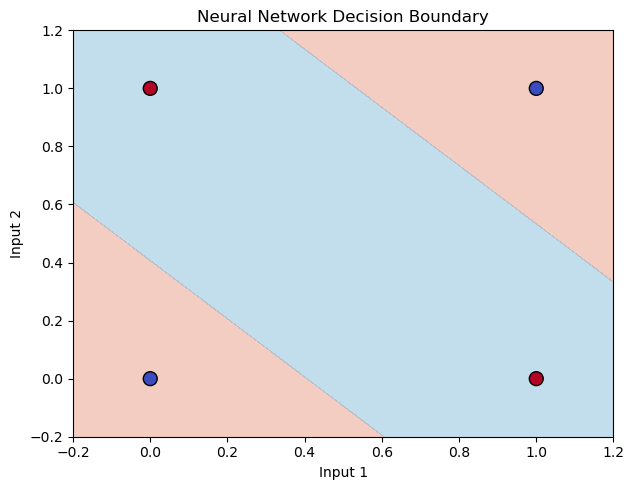

In [6]:
# Plot Decision Boundaries
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 400), np.linspace(-0.2, 1.2, 400))
xx_test = np.c_[xx.ravel(), yy.ravel()]

zz_nn = model_predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 5))

# Neural Network Decision Boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, zz_nn, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Neural Network Decision Boundary')

plt.tight_layout()
plt.show()